In [3]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from data import load_synth 
from data import load_mnist
from data import download_mnist
from data import save_mnist
from data import init
from data import load

In [5]:
# Activation functions
def sigmoid_array(z): 
    sigmoid = 1.0/(1.0 + np.exp(-z))
    return sigmoid 

def softmax_array(z):
    output = (np.exp(z)/np.exp(z).sum())
    return output

In [6]:
(x_train, y_train), (x_test, y_test), num_cls = load_mnist()

In [7]:
def normalize_tensor(z):
    factor = np.linalg.norm(z)
    normalized = z/factor
    
    return normalized

In [8]:
normal_x_train = normalize_tensor(x_train)

In [38]:
def initialize_parameters_tensor(x_input, hidden_nodes=300, output_labels=10):
    
    attributes = x_input.shape[1]

    W = np.random.normal(0, 1, size=(attributes, hidden_nodes))
    b = np.random.normal(0, 1, hidden_nodes)
    b = np.expand_dims(b, axis=1)
    V = np.random.normal(0, 1, size=(hidden_nodes, output_labels))
    c = np.random.normal(0, 1, output_labels)
    c = np.expand_dims(c, axis=1)
    
    weights = {'W': W, 'b': b, 'V':V, 'c': c}
    
    return weights

In [10]:
q5_weights = initialize_parameters_tensor(x_train, hidden_nodes=300, output_labels=10)

In [11]:
W1 = q5_weights['W']
print('W1: ', W1.shape)
b1 = q5_weights['b']
print('b1: ', b1.shape)
W2 = q5_weights['V']
print('W2: ', W2.shape)
b2 = q5_weights['c']
print('b2: ', b2.shape)

W1:  (784, 300)
b1:  (300, 1)
W2:  (300, 10)
b2:  (10, 1)


In [46]:
def forward_prop_vector(x, W, b, V, c):
    """
    forward propagation for a two layer neural network
    
    Arguments:
    x - input
    weights -- 
        W - weights, layer 1
        b - bias, layer 1
        V - weights, layer 2
        c - bias, layer 2
    Return: parameters
    """
    x = np.expand_dims(x, axis=1)
    print('x:', x.shape)
    k = np.dot(W.T, x) + b
    print('k:', k.shape)
    h = sigmoid_array(k)
    print('h:', h.shape)
    o = np.dot(V.T, h) + c
    print('o:', o.shape)
    yhat = softmax_array(o) 
    print('yhat:', yhat.shape)
    parameters = {'k': k, 'h': h, 'o': o, 'yhat': yhat}
    
    return parameters

In [47]:
fwd_params = forward_prop_vector(normal_x_train[0], W_1, b_1, V_1, c_1)

x: (784, 1)
k: (300, 1)
h: (300, 1)
o: (10, 1)
yhat: (10, 1)


In [14]:
def compute_loss(ypred, y):
    
    loss = -(np.log(ypred[y]))
    
    return loss/float(ypred.shape[0])

In [15]:
def vector_loss(yhat, y):
    y_vector = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    y_vector[y] = 1
    y_vector = np.expand_dims(y_vector, axis=1)
    
    loss = -np.sum(np.dot(y_vector.T, np.log(yhat)))
    
    return loss/float(yhat.shape[0])

In [16]:
y1loss = compute_loss(fwd_params['yhat'], y_train[0])
y1loss

array([1.45049781])

In [17]:
def sigmoid_derivative(x):
    sig_d = np.dot(sigmoid_array(x).T, (1-sigmoid_array(x)))
    return(sig_d)

In [54]:
def back_prop_vector(x, W, b, V, c, y, parameters):
    
    o = parameters['o']
    h = parameters['h']
    k = parameters['k']
    yhat = parameters['yhat']
    
    x = np.expand_dims(x, axis=1)
    # one-hot vector
    one_hot_vector = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    one_hot_vector[y] = 1
    one_hot_vector = np.expand_dims(one_hot_vector, axis=1) 

    grad_o = yhat - one_hot_vector
    do_dV = h
    grad_V = np.dot(do_dV, grad_o.T)
    grad_c = grad_o
    do_dh = V
    grad_h = np.dot(do_dh, grad_o)
    dh_dk = sigmoid_derivative(k)
    dh_dW = x
    grad_W = np.dot(dh_dW, (dh_dk * grad_h).T)
    grad_b = grad_h * dh_dk
    gradients = {'grad_o': grad_o,
                 'grad_V': grad_V,
                 'grad_c': grad_c,
                 'grad_h': grad_h,
                 'grad_W': grad_W,
                 'grad_b': grad_b,
                }
    
    return gradients

In [49]:
grads = back_prop_vector(normal_x_train[0], W_1, b_1, V_1, c_1, y_train[0], fwd_params)

In [50]:
grads

{'grad_o': array([[ 7.12264274e-13],
        [ 1.00726920e-11],
        [ 4.05183901e-17],
        [ 4.24849306e-02],
        [ 4.98180021e-06],
        [-9.99999589e-01],
        [ 6.73076424e-09],
        [ 9.57509549e-01],
        [ 8.52046806e-08],
        [ 3.56518054e-08]]),
 'grad_V': array([[2.45469679e-13, 3.47138072e-12, 1.39639690e-17, ...,
         3.29989261e-01, 2.93643334e-08, 1.22867839e-08],
        [5.53137857e-13, 7.82235958e-12, 3.14662076e-17, ...,
         7.43593073e-01, 6.61691680e-08, 2.76868628e-08],
        [3.69505770e-13, 5.22547311e-12, 2.10199774e-17, ...,
         4.96733187e-01, 4.42021623e-08, 1.84953089e-08],
        ...,
        [3.78092217e-13, 5.34690084e-12, 2.15084323e-17, ...,
         5.08276101e-01, 4.52293169e-08, 1.89250965e-08],
        [4.54463279e-13, 6.42692439e-12, 2.58529328e-17, ...,
         6.10943080e-01, 5.43652123e-08, 2.27477875e-08],
        [3.74649509e-13, 5.29821478e-12, 2.13125879e-17, ...,
         5.03648007e-01, 4.481748

In [20]:
def vector_propagation(x, W, b, V, c, y):
    
    parameters = forward_prop_vector(x, W, b, V, c)
    prediction = parameters['yhat']
    cost = compute_loss(prediction, y)
    gradients = back_prop_vector(x, W, b, V, c, y, parameters)
    
    return cost, gradients

In [21]:
cost, grad = vector_propagation(normal_x_train[0], W1, b1, W2, b2, y_train[0])

In [52]:
def gradient_descent(x_set, W, b, V, c, y_set, lr, epochs):
    
    loss_record = []
    avg_loss_per_epoch = []
    std_loss_per_epoch = []
    
    for num in range(epochs):
        loss_per_epoch = []
        for x, y in zip(x_set, y_set):
            print('*')
            loss, grads = vector_propagation(x, W, b, V, c, y)

            grad_W = grads['grad_W']
            grad_b = grads['grad_b']
            grad_V = grads['grad_V']
            grad_c = grads['grad_c']
            # Updating weights:

            W -= lr * grad_W
            
            b -= lr * grad_b
            
            V -= lr * grad_V
            
            c -= lr * grad_c
            
            weights = {'W': W, 'b': b, 'V': V, 'c': c}
            loss_record.append(loss)
            loss_per_epoch.append(loss)
            
        avg_loss_per_epoch.append(np.mean(loss_record))
        std_loss_per_epoch.append(np.std(loss_record))
    
    return weights, grads, loss_record, avg_loss_per_epoch, std_loss_per_epoch

In [117]:
weights_001, grads_001, loss_001 = gradient_descent(normal_x_train, W1, b1, W2, b2, y_train, 0.001, 5)

In [55]:
weights_001

NameError: name 'weights_001' is not defined

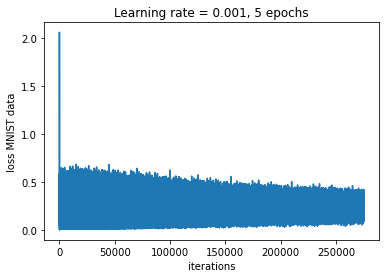

In [118]:
plt.plot(loss_001)
plt.ylabel('loss MNIST data')
plt.xlabel('iterations')
plt.title("Learning rate = 0.001, 5 epochs")
plt.show()

In [119]:
weights_003, grads_003, loss_003 = gradient_descent(normal_x_train, W1, b1, W2, b2, y_train, 0.003, 5)

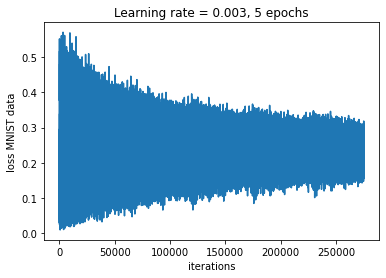

In [120]:
plt.plot(loss_003)
plt.ylabel('loss MNIST data')
plt.xlabel('iterations')
plt.title("Learning rate = 0.003, 5 epochs")
plt.show()

In [121]:
weights_01, grads_01, loss_01 = gradient_descent(normal_x_train, W1, b1, W2, b2, y_train, 0.01, 5)

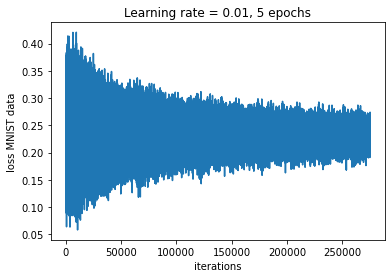

In [122]:
plt.plot(loss_01)
plt.ylabel('loss MNIST data')
plt.xlabel('iterations')
plt.title("Learning rate = 0.01, 5 epochs")
plt.show()

In [123]:
weights_03, grads_03, loss_03 = gradient_descent(normal_x_train, W1, b1, W2, b2, y_train, 0.03, 5)

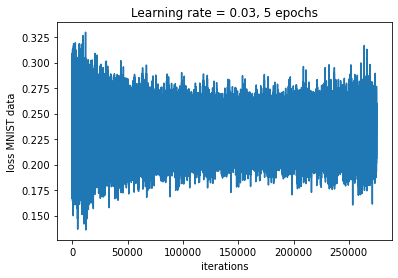

In [124]:
plt.plot(loss_03)
plt.ylabel('loss MNIST data')
plt.xlabel('iterations')
plt.title("Learning rate = 0.03, 5 epochs")
plt.show()

In [41]:
q5_weights_1 = initialize_parameters_tensor(normal_x_train, hidden_nodes=300, output_labels=10)
W_1 = q5_weights_1['W']
b_1 = q5_weights_1['b']
V_1 = q5_weights_1['V']
c_1 = q5_weights_1['c']

In [43]:
print(W_1.shape)
print(b_1.shape)
print(V_1.shape)
print(c_1.shape)

(784, 300)
(300, 1)
(300, 10)
(10, 1)


In [53]:
weights1, grads1, loss1, avg_loss, std_loss = gradient_descent(normal_x_train, W_1, b_1, V_1, b_1, y_train, 0.01, 5)

*
x: (784, 1)
k: (300, 1)
h: (300, 1)


ValueError: operands could not be broadcast together with shapes (10,1) (300,1) 

### Question 6

In [90]:
def create_batches(x, y, batch_size):
    
    batches = []
#     data = np.hstack((x, y))
#     np.random.shuffle(data)
    n_batches = x.shape[0] // batch_size
    #print(n_batches)
    i = 0
    
    X_mini_batches = []
    Y_mini_batches = []
    for i in range(n_batches + 1):
        #mini_batches = []
        X_mini = x[:batch_size]
        Y_mini = y[:batch_size].reshape((-1, 1))
        X_mini_batches.append(X_mini)
        Y_mini_batches.append(Y_mini)
        #mini_batches.append((X_mini, Y_mini))
#     if x.shape[0] % batch_size != 0:
#         mini_batch = data[i * batch_size:data.shape[0]]
#         X_mini = mini_batch[:, :-1]
#         Y_mini = mini_batch[:, -1].reshape((-1, 1))
#         mini_batches.append((X_mini, Y_mini))
    return X_mini_batches, Y_mini_batches

In [86]:
X_batches, Y_batches = create_batches(normal_x_train, y_train, 55)

1000


In [87]:
len(X_batches)

1001

In [37]:
def batch_gd(x, y, W, b, V, c, learning_rate=0.01, batch_size=55):
    losses = []
    max_iters = 3
    for itr in range(max_iters):
        x_batch, y_batch = create_batches(x, y, batch_size)
        for X_mini, Y_mini in zip(x_batch, y_batch):
            cost, grads = gradient_descent(X_mini,  W, b, V, c, Y_mini, learning_rate, 1)
            losses.append(cost)
 
    return losses

In [34]:
loss_bgd = batch_gd(normal_x_train, y_train, W1, b1, W2, b2, learning_rate=0.01, batch_size=55)

NameError: name 'batch_gd' is not defined